<a href="https://colab.research.google.com/github/SunkariApoorva/153140-Phase1/blob/master/Reference_Jupyter_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Please follow the below structure while attempting the hackathon, make sure to submit only one jupyter file with all the models, and you can always mention your best model by giving it the header as 'Best Model'.

## Please make sure to maintain the clarity of analysis in the notebook with proper headers and inisghts/inferences, so that it can be interpretable 


## Please follow the same format as mentioned below, as you will be evaluated basis on your Jupyter Notebook for L2 selection.

## Importing Necessary Libraries

In [137]:
import numpy as np
import pandas as pd

In [138]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

## 1 Data Cleaning

In [139]:
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [140]:
train_df = pd.read_csv("/content/gdrive/My Drive/Data_Train.csv")
#test_df = pd.read_csv("/content/gdrive/My Drive/Data_Test.csv")

In [141]:
train_df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,...,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [142]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [143]:
train_df.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          5575
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1414
Debt to Income         3489
Postal Code            1389
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        4186
Duration                  0
Unpaid Amount          4852
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

In [144]:
# AvgSalDesignations={}
# j=0
# for i in train_df['Designation'].value_counts().iteritems():
#     AvgSalDesignations[i[0]]=train_df[train_df['Designation']==i[0]]['Yearly Income'].mean()
#     print(j)
#     j=j+1

In [145]:
# AvgSalDesignations

In [146]:
train_df.dropna(inplace=True)

In [147]:
#


# for i in AvgSalDesignations:
#   train_df['Yearly Income'].fillna(AvgSalDesignations[train_df['Designation'][0]],inplace=True)

# for index,row in train_df.iterrows():
#   if row['Yearly Income']== None:
#     row['Yearly Income']=AvgSalDesignations[row['Designation']]

# train_df.apply(
#     lambda row: AvgSalDesignations[row['Designation']] if row['Yearly Income']==None else row['Yearly Income'],axis=1)


In [148]:
# train_df.info()

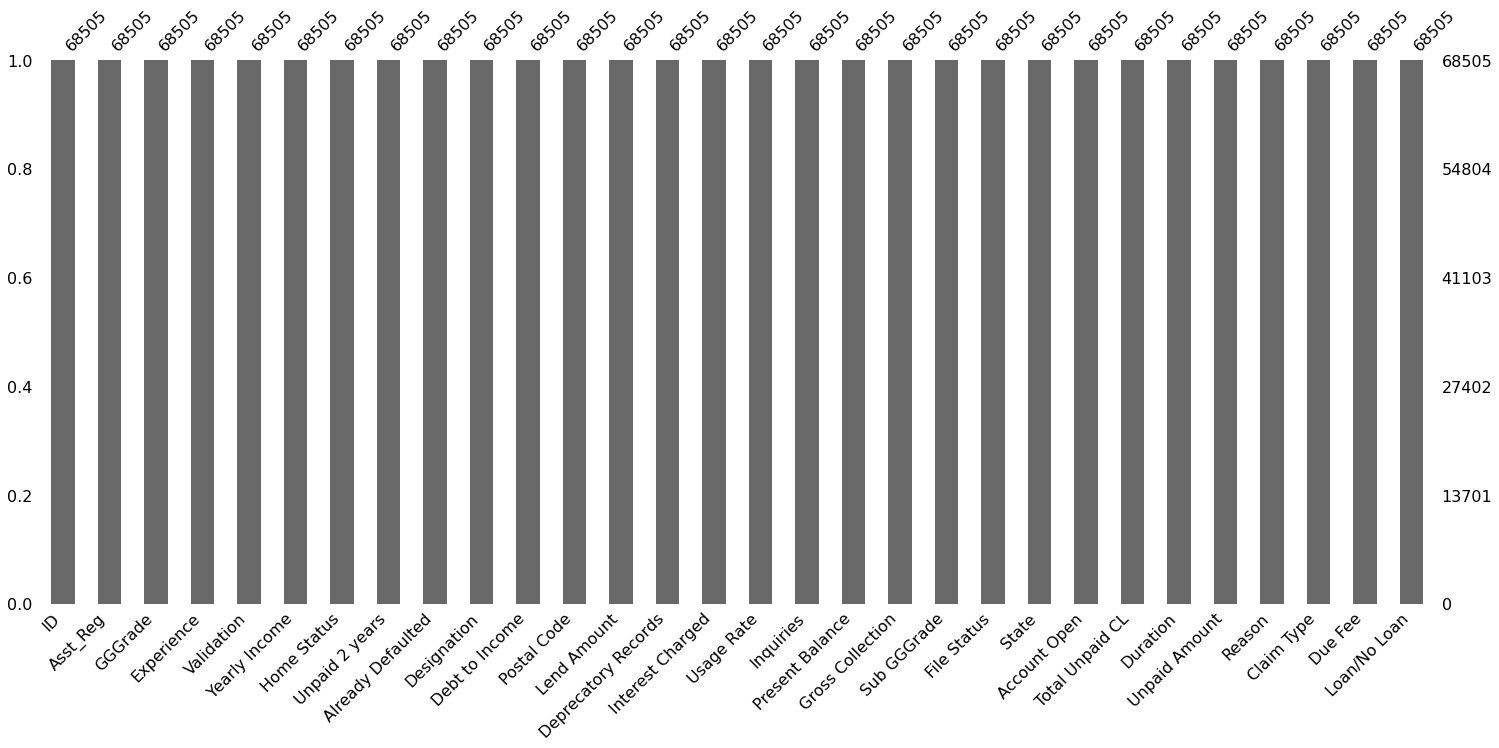

In [149]:
import missingno as msno
msno.bar(train_df)

In [150]:
train_df.drop(labels=['ID','Postal Code','Designation'],axis=1,inplace= True)

In [151]:
train_df.drop(labels=['Sub GGGrade','State','GGGrade'],axis=1,inplace= True)

## 2 Exploratory Data Analyis

In [152]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
train_df['Validation']= label_encoder.fit_transform(train_df['Validation'])
train_df['Home Status']= label_encoder.fit_transform(train_df['Home Status'])
train_df['File Status']= label_encoder.fit_transform(train_df['File Status'])
train_df['Claim Type']= label_encoder.fit_transform(train_df['Claim Type'])
train_df['Reason']= label_encoder.fit_transform(train_df['Reason'])
  

In [153]:
train_df.Duration.value_counts()

3 years    47010
5 years    21495
Name: Duration, dtype: int64

In [154]:
train_df['Experience'].replace(['>10yrs','2yrs','3yrs','<1yr','1yrs','5yrs','4yrs','7yrs','8yrs','6yrs','9yrs' 'Diploma '],
                        [10,2,3,0,1,5,4,7,8,6,9], inplace=True)
train_df['Duration'].replace(['3 years','5 years'],[3,5],inplace=True)

In [155]:
train_df.head()

,Asst_Reg,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,...,Gross Collection,File Status,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,421802,10,2,633600.00,0,0,0,12.5496,42023.25,0,...,0.0,0,17,58598.0,3,31216.05,2,0,0.0,0
1,3964312,7,1,85483.20,4,0,0,9.0048,38133.00,0,...,0.0,1,15,18924.0,5,11660.49,2,0,0.0,0
2,4247560,0,1,79200.00,4,0,0,24.9144,17100.00,0,...,0.0,1,7,15604.0,5,5637.87,5,0,0.0,0
3,197179,0,2,61600.00,4,0,0,16.5816,5130.00,0,...,0.0,0,9,22410.0,3,15607.17,5,0,0.0,1
4,4646684,2,1,68053.92,4,0,0,40.0512,19665.00,0,...,0.0,0,10,36022.0,5,27472.86,2,0,0.0,0


In [156]:
train_df.corr()

,Asst_Reg,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Debt to Income,Lend Amount,Deprecatory Records,Interest Charged,...,Gross Collection,File Status,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
Asst_Reg,1.000000,-0.044313,0.036625,0.015642,0.036358,0.008668,0.088797,0.037526,0.063968,-0.003003,...,-0.108796,0.299059,0.055692,0.061365,0.061537,0.033218,-0.004740,0.031126,-0.066383,-0.415039
Validation,-0.044313,1.000000,0.105463,-0.020071,0.000565,0.013215,0.078530,0.292177,0.030570,-0.013190,...,0.045950,-0.039160,0.051392,0.063597,0.170224,0.098894,0.029952,0.001526,0.020431,0.000970
Yearly Income,0.036625,0.105463,1.000000,-0.184187,0.051989,0.015004,-0.227349,0.410832,-0.007496,0.001859,...,0.013993,0.044670,0.158822,0.366515,0.066096,0.373161,0.007926,-0.008664,0.011635,-0.001667
Home Status,0.015642,-0.020071,-0.184187,1.000000,-0.044602,-0.009971,0.005362,-0.188079,0.011786,-0.001910,...,-0.000773,-0.025278,-0.116756,-0.175187,-0.104863,-0.161603,0.040745,-0.006806,-0.001373,-0.019408
Unpaid 2 years,0.036358,0.000565,0.051989,-0.044602,1.000000,0.139745,-0.016802,-0.015491,-0.013334,0.000244,...,0.001272,0.004648,0.046248,-0.049409,-0.009134,-0.036141,0.027247,-0.004688,0.023499,-0.028419
Already Defaulted,0.008668,0.013215,0.015004,-0.009971,0.139745,1.000000,0.002987,-0.001469,0.001924,-0.000999,...,0.001084,0.001619,0.015758,0.009204,0.004309,-0.001298,0.004675,-0.001482,0.011941,-0.007118
Debt to Income,0.088797,0.078530,-0.227349,0.005362,-0.016802,0.002987,1.000000,0.030387,-0.061234,-0.002150,...,0.005480,0.018666,0.289489,0.083962,0.109617,0.136171,-0.063979,0.044626,-0.001771,-0.088414
Lend Amount,0.037526,0.292177,0.410832,-0.188079,-0.015491,-0.001469,0.030387,1.000000,-0.090159,-0.002594,...,0.068381,0.067990,0.180178,0.356214,0.408216,0.347678,-0.155668,0.007576,0.035481,-0.059794
Deprecatory Records,0.063968,0.030570,-0.007496,0.011786,-0.013334,0.001924,-0.061234,-0.090159,1.000000,0.004287,...,-0.012882,0.008354,-0.026180,-0.115037,-0.031920,-0.109422,0.037901,0.008219,-0.009801,-0.022095
Interest Charged,-0.003003,-0.013190,0.001859,-0.001910,0.000244,-0.000999,-0.002150,-0.002594,0.004287,1.000000,...,-0.001891,0.000736,0.001120,0.006610,0.000397,0.006321,0.003079,-0.000868,-0.000564,0.007391


In this section you can talk about the plots and the insights you have generated from the data

























## 3 Feature Engineering

In this section you can implement the feature engineering techniques for dimensionality reduction












In [157]:
X =train_df.drop('Loan/No Loan',axis='columns')
y=train_df['Loan/No Loan']

In [159]:
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)

In [160]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]


In [161]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]

## 4 Modelling + HyperParameter Tuning

In this you can build various ML models and try tuning the parameters involved to achieve better score

## Model 1

## Model 2 - Best Model

## Model 3